# This file contains the analysis of the database fourrierData!

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as sms
import sklearn.linear_model as slm
import matplotlib.lines as lines
import sklearn.preprocessing as spp
import matplotlib.cm as cm
import datetime

## downloading the database

In [12]:
df=pd.read_csv("fourrierData.csv") 

## Checking dimensions

In [22]:
dfShape=df.shape
nrow=dfShape[0]
ncol=dfShape[1]
print("data frame df has ",nrow,"lines and",ncol,"columns")

data frame df has  50000 lines and 10 columns


## Dealing with nan Values

In [23]:
nNan = df["callPrice"].isna().sum()
print("The database has",nNan,"rows with ",np.nan, "values")

The database has 0 rows with  nan values


In [24]:
dfAlpha=df.dropna()
nrowAlpha = dfAlpha.shape[0]
ncolAlpha = dfAlpha.shape[1]
print("For now on, our data has",nrowAlpha,"rows and",ncolAlpha,"columns")

For now on, our data has 50000 rows and 10 columns


## Dealing with ouliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb9c24ec790>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9c24e3ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb9c24e3a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9c2474cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9c24ecd90>],
 'means': []}

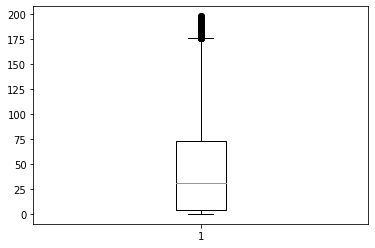

In [26]:
plt.boxplot(dfAlpha["callPrice"])

In [27]:
dfAlpha["callPrice"].describe()

count    50000.000000
mean        44.729383
std         46.094227
min          0.000000
25%          3.769585
50%         30.709732
75%         72.712269
max        197.900608
Name: callPrice, dtype: float64

In [28]:
dfBeta=dfAlpha
dfBeta.drop(dfBeta[dfBeta.callPrice < 0].index, inplace=True)
nrowBeta = dfBeta.shape[0]
ncolBeta = dfBeta.shape[1]
print("Data base version beta has dimensions",nrowBeta,"*",ncolBeta)
dfBeta.describe()

Data base version beta has dimensions 50000 * 10


,kLog,S0,theta,V0,sigma,rho,r,kappa,tau,callPrice
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,4.290903,99.595489,0.249731,0.299969,0.250239,-0.476105,4.957585e-02,1.000905,1.701439,44.729383
std,1.002782,57.618418,0.144779,0.144531,0.144574,0.274255,2.885907e-02,0.578151,0.404063,46.094227
min,-8.220824,0.031994,0.000004,0.050010,0.000003,-0.949961,8.154050e-07,0.000013,1.000016,0.000000
25%,3.903760,49.842611,0.122856,0.174712,0.124355,-0.713835,2.447263e-02,0.502060,1.350829,3.769585
50%,4.596093,99.027328,0.249438,0.299995,0.250712,-0.476516,4.937261e-02,1.000295,1.701202,30.709732
75%,5.003893,149.134135,0.375435,0.425157,0.375934,-0.238392,7.444095e-02,1.503788,2.052677,72.712269
max,5.298312,199.995235,0.499994,0.549986,0.499993,-0.000010,9.999936e-02,1.999962,2.399985,197.900608


## spliting into train, test, explanatory, target

In [37]:
splitBeta = sms.train_test_split(dfBeta,test_size=0.2)
trainBeta = splitBeta[0]
testBeta = splitBeta[1]

In [38]:
beginTime = datetime.datetime.now()
trainBeta.to_csv(r'trainData.csv', index = False)
testBeta.to_csv(r'testData.csv', index = False)
endTime=datetime.datetime.now()
diff=endTime-beginTime
print("creating training database takes",diff)

creating training database takes 0:00:00.906382


In [39]:
nrowBetaTrain = trainBeta.shape[0]
ncolBetaTrain = trainBeta.shape[1]
nrowBetaTest = testBeta.shape[0]
ncolBetaTest = testBeta.shape[1]
print("training base version beta has",nrowBetaTrain,"lines ")
print("test base version beta has",nrowBetaTest,"lines ")

training base version beta has 40000 lines 
test base version beta has 10000 lines 


In [40]:
trainBetaY=trainBeta[['callPrice']]
testBetaY=testBeta[['callPrice']]
trainBetaX=trainBeta[trainBeta.columns.difference(['callPrice'])]
testBetaX=testBeta[testBeta.columns.difference(['callPrice'])]

## Ordinary Least Square Lenear Regression

In [41]:
regOLS = slm.LinearRegression().fit(trainBetaX, trainBetaY)
scoreTrainOLS=regOLS.score(trainBetaX, trainBetaY)
scoreTestOLS=regOLS.score(testBetaX, testBetaY)
print("Score of OLS on traing data:",scoreTrainOLS)
print("Score of OLS on test data:",scoreTestOLS)

Score of OLS on traing data: 0.8508357149021918
Score of OLS on test data: 0.848769995602458


Text(0.5, 1.0, 'train: Observed VS Predicted')

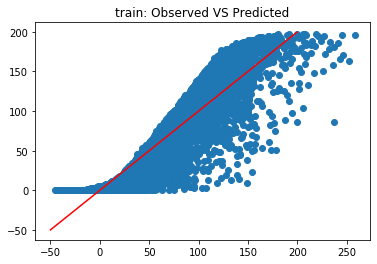

In [42]:
trainBetaYPredictOLS=regOLS.predict(trainBetaX)
plt.scatter(trainBetaYPredictOLS,trainBetaY)
plt.plot(np.arange(-50,200,0.5),np.arange(-50,200,0.5),color="r")
plt.title("train: Observed VS Predicted")

In [43]:
diffTrainBetaOLS = trainBetaY-trainBetaYPredictOLS
print("for traindatabase, overestimations: ",((diffTrainBetaOLS[diffTrainBetaOLS['callPrice'] >= 0].size)/diffTrainBetaOLS.size)*100,"%     ","underEstimations: ",((diffTrainBetaOLS[diffTrainBetaOLS['callPrice'] < 0].size)/diffTrainBetaOLS.size)*100)

for traindatabase, overestimations:  44.015 %      underEstimations:  55.985


Text(0.5, 1.0, 'test: Observed VS Predicted')

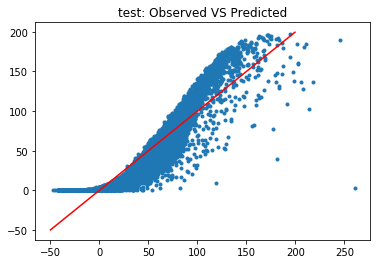

In [44]:
testBetaYPredictOLS=regOLS.predict(testBetaX)
plt.plot(testBetaYPredictOLS,testBetaY,'.')
plt.plot(np.arange(-50,200,0.5),np.arange(-50,200,0.5),color="r")
plt.title("test: Observed VS Predicted")

In [124]:
diffTestBetaOLS = testBetaY-testBetaYPredictOLS
print("for testdatabase, overestimations: ",((diffTestBetaOLS[diffTestBetaOLS['callPrice'] >= 0].size)/diffTestBetaOLS.size)*100,"%     ","underEstimations: ",((diffTestBetaOLS[diffTestBetaOLS['callPrice'] < 0].size)/diffTestBetaOLS.size)*100)

for testdatabase, overestimations:  45.981905268759974 %      underEstimations:  54.01809473124002


## Ridge Linear Regression

In [45]:
clf = slm.Ridge(alpha=1)
regRIDGE=clf.fit(trainBetaX,trainBetaY)
scoreTrainRIDGE=regRIDGE.score(trainBetaX, trainBetaY)
scoreTestRIDGE=regRIDGE.score(testBetaX, testBetaY)
print("Score of RIDGE on traing data:",scoreTrainRIDGE)
print("Score of RIDGE on test data:",scoreTestRIDGE)

Score of RIDGE on traing data: 0.8508348669389926
Score of RIDGE on test data: 0.8487750110923309


## Lasso Linear Regression

In [47]:
cclf = slm.Lasso()
regLasso=cclf.fit(trainBetaX,trainBetaY)
scoreTrainLasso=regLasso.score(trainBetaX, trainBetaY)
scoreTestLasso=regLasso.score(testBetaX, testBetaY)
print("Score of Lasso on traing data:",scoreTrainLasso)
print("Score of Lasso on test data:",scoreTestLasso)

Score of Lasso on traing data: 0.8437299483968267
Score of Lasso on test data: 0.8429879471566148


In [48]:
print(regLasso.coef_)
print(trainBetaX.columns)

[  0.62847102   0.         -21.14306118   0.           0.
   0.          -0.           0.           0.        ]
Index(['S0', 'V0', 'kLog', 'kappa', 'r', 'rho', 'sigma', 'tau', 'theta'], dtype='object')


## Lasso with standardization

###  standardizing

In [49]:
sc = spp.StandardScaler()
trainGammaX =sc.fit_transform(trainBetaX)
trainGammaY=sc.fit_transform(trainBetaY)
testGammaX =sc.fit_transform(testBetaX)
testGammaY=sc.fit_transform(testBetaY)

### new means for train

In [50]:
print(np.mean(trainGammaX,axis=0))

[-5.75539616e-17 -2.21689334e-16  2.43005616e-16 -1.85806925e-16
 -2.11741735e-16  2.91322522e-17  7.88702437e-17 -2.67164069e-16
  7.35411732e-17]


### new variances for train

In [51]:
print(np.var(trainGammaX,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


### implementing lasso itself

In [52]:
myAlphas = np.array(np.arange(0.01,1.1,0.1))
alphaForPath, coefsLasso, _ = slm.lasso_path(trainGammaX,trainGammaY,alphas=myAlphas)
coefsLasso=coefsLasso[0]

coefsLasso is the matrix of coefficients with 9 lines (9 explanatory variables) and 10 colomns (because 10 values of α tried).

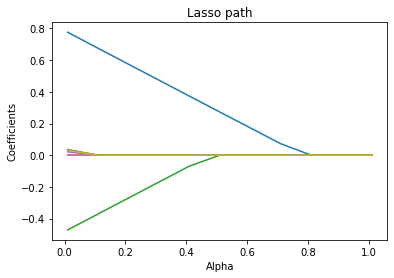

In [53]:
couleurs = cm.rainbow(np.linspace(0,1,9))

for i in range(coefsLasso.shape[0]):
    plt.plot(alphaForPath,coefsLasso[i,:])

plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path')
plt.show()

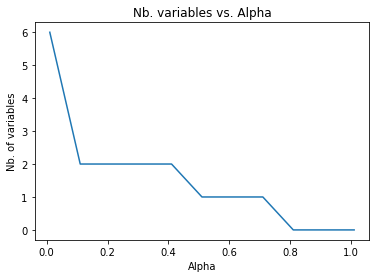

In [54]:
## Number of NonNul coefs
nbNonZero =np.apply_along_axis(func1d=np.count_nonzero,arr=coefsLasso,axis=0)

plt.plot(alphaForPath,nbNonZero)
plt.xlabel('Alpha')
plt.ylabel('Nb. of variables')
plt.title('Nb. variables vs. Alpha')
plt.show()

### towards crossed validation

In [57]:
lcv = slm.LassoCV(alphas=myAlphas,normalize=False,fit_intercept=False,random_state=0,cv=5)

In [58]:
lcv.fit(trainGammaX,trainGammaY) 

/home/taurus/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=False, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
        verbose=False)

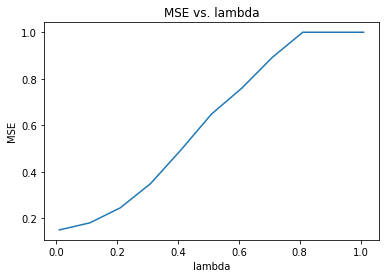

In [59]:
#average MSE vs Alpha
avgMse = np.mean(lcv.mse_path_,axis=1)
plt.plot(lcv.alphas_,avgMse)
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('MSE vs. lambda')
plt.show()

In [262]:
alphChosen=lcv.alpha_
print("Value of alpha chosen is: ",alphChosen)


Value of alpha chosen is:  0.01


To sum up, it tends tends to prefer an OLS regression

In [263]:
scoreTrainLCV = lcv.score(trainGammaX,trainGammaY)
scoretestLCV = lcv.score(testGammaX,testGammaY)
print("Score of LCV on traing data:",scoreTrainLCV)
print("Score of LCV on test data:",scoretestLCV)

Score of LCV on traing data: 0.8531255542058103
Score of LCV on test data: 0.8516262143758211


DISAPPOINTMENT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!